<a href="https://colab.research.google.com/github/MarynaZinchenko888/python_for_ds_tasks/blob/main/Zinchenko_M_HW_16_1_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D1%83%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F_%D0%BE%D1%80%D0%B5%D0%BD%D0%B4%D0%BD%D0%BE%D1%97_%D0%BF%D0%BB%D0%B0%D1%82%D0%B8_%D0%B7%D0%B0_%D0%B6%D0%B8%D1%82%D0%BB%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Прогнозування орендної плати за житло

## Мета завдання
Застосувати знання з лекції для побудови моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Ви пройдете весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `House_Rent_Dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)


In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [88]:
# 1.1 Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/House_Rent_Dataset.csv', sep=None, engine='python')

In [89]:
# 1.2 Розмір датасету
df.shape

(4746, 12)

In [90]:
# 1.3 перші 5 рядків
df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [91]:
# 1.4 Загальна інформація про дані (включно з типами даних та кількістю значень)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## Завдання 2: Дослідницький аналіз даних (EDA) (5 балів)

**Що потрібно зробити:**
1. **Аналіз пропущених значень.** Перевірте наявність і відсоток пропущених значень у кожній колонці
2. **Базова статистика.** Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.
3. **Аналіз цільової змінної.** Побудуйте гістограму розподілу цільової змінної (Rent)
4. **Робота з викидами.** Знайдіть та видаліть викиди в цільовій змінній (якщо є). Визначити викиди можна будь-яким зрозумілим для вас способом, як варіант - таким, що використовується в побудові box-plot (https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers).
5. **Аналіз категоріальних змінних.** Виведіть кількість унікальних значень для кожної з категоріальних колонок.


In [92]:
# 2.1 Аналіз пропущених значень.
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_percent

,0
Posted On,0.0
BHK,0.0
Rent,0.0
Size,0.0
Floor,0.0
Area Type,0.0
Area Locality,0.0
City,0.0
Furnishing Status,0.0
Tenant Preferred,0.0


In [93]:
# 2.2 Базова статистика.
print("\nБазова статистика для числових змінних:")
stats = df.describe()
stats.round()


Базова статистика для числових змінних:


,BHK,Rent,Size,Bathroom
count,4746.0,4746.0,4746.0,4746.0
mean,2.0,34993.0,967.0,2.0
std,1.0,78106.0,634.0,1.0
min,1.0,1200.0,10.0,1.0
25%,2.0,10000.0,550.0,1.0
50%,2.0,16000.0,850.0,2.0
75%,3.0,33000.0,1200.0,2.0
max,6.0,3500000.0,8000.0,10.0


In [94]:
# 2.3 Аналіз цільової змінної.

# Фільтруємо дані без пропусків у Rent
df_clean = df[df['Rent'].notna()].copy()

# Розподіл лайків
fig = px.histogram(
    df_clean,
    x='Rent',
    nbins=100,
    title='Розподіл орендної плати (Rent)',
    labels={'Rent': 'Орендна плата', 'count': 'Кількість'}
)
fig.update_layout(
    showlegend=False,
    height=400
)
fig.show()

In [122]:
# Логарифмування
df_clean['log_target'] = np.log1p(df_clean['Rent'])
fig = px.histogram(
    df_clean,
    x='log_target',
    nbins=100,
    title='Розподіл орендної плати (Rent)',
    labels={'Rent': 'Орендна плата', 'count': 'Кількість'}
)
fig.update_layout(
    showlegend=False,
    height=400
)
fig.show()


Межі для викидів: -24500 – 67500
Розмір датасету після видалення викидів: (4226, 12)


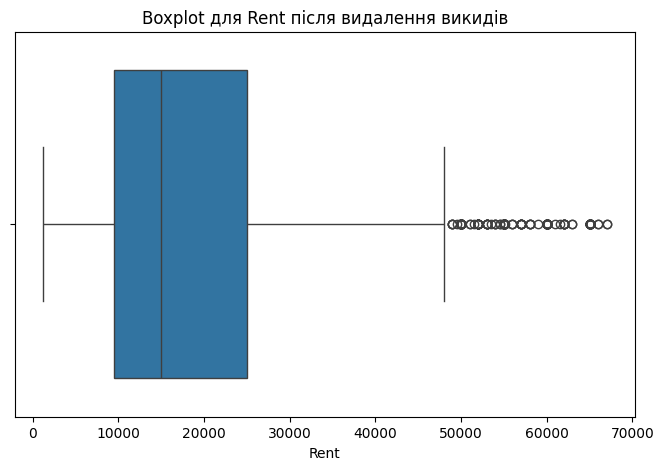

In [96]:
# 2.4 Робота з викидами.
Q1 = df["Rent"].quantile(0.25)
Q3 = df["Rent"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(f"\nМежі для викидів: {lower_bound:.0f} – {upper_bound:.0f}")

# Відфільтруємо дані без викидів
df = df[(df["Rent"] >= lower_bound) & (df["Rent"] <= upper_bound)]
print("Розмір датасету після видалення викидів:", df.shape)

plt.figure(figsize=(8,5))
sns.boxplot(x=df["Rent"])
plt.title("Boxplot для Rent після видалення викидів")
plt.show()

In [97]:
# 2.5 Аналіз категоріальних змінних
print("\nКількість унікальних значень у категоріальних колонках:")
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()}")


Кількість унікальних значень у категоріальних колонках:
Posted On: 80
Floor: 340
Area Type: 3
Area Locality: 1997
City: 6
Furnishing Status: 3
Tenant Preferred: 3
Point of Contact: 3



## Завдання 3: Аналіз кореляцій та взаємозв'язків (3 бали)

**Що потрібно зробити:**
1. Обчисліть матрицю кореляцій для числових змінних
2. Візуалізуйте кореляційну матрицю за допомогою heatmap
3. Побудуйте scatter plot між Size та Rent
4. Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)


In [98]:
# 3.1 Обчислення матриці кореляцій для числових змінних
corr_matrix = df.corr(numeric_only=True)
print("Матриця кореляцій:")
display(corr_matrix)

Матриця кореляцій:


,BHK,Rent,Size,Bathroom
BHK,1.000000,0.401268,0.698453,0.747918
Rent,0.401268,1.000000,0.393605,0.506528
Size,0.698453,0.393605,1.000000,0.680607
Bathroom,0.747918,0.506528,0.680607,1.000000


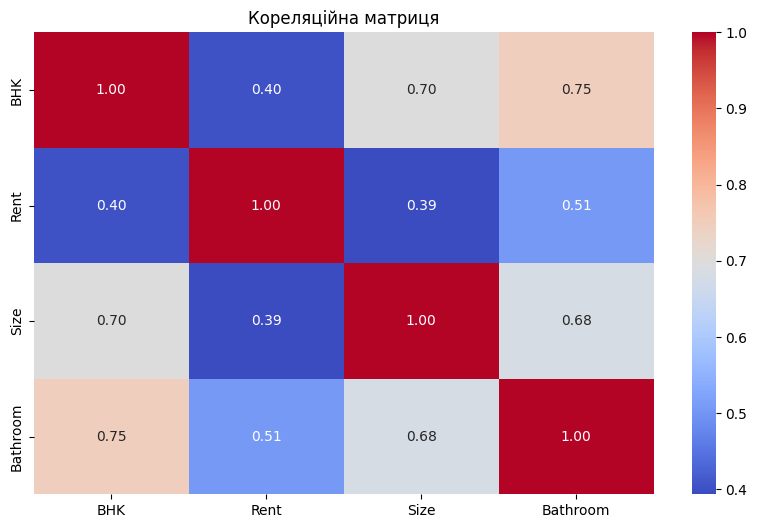

In [99]:
# 3.2 Візуалізація кореляційної матриці за допомогою heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця")
plt.show()

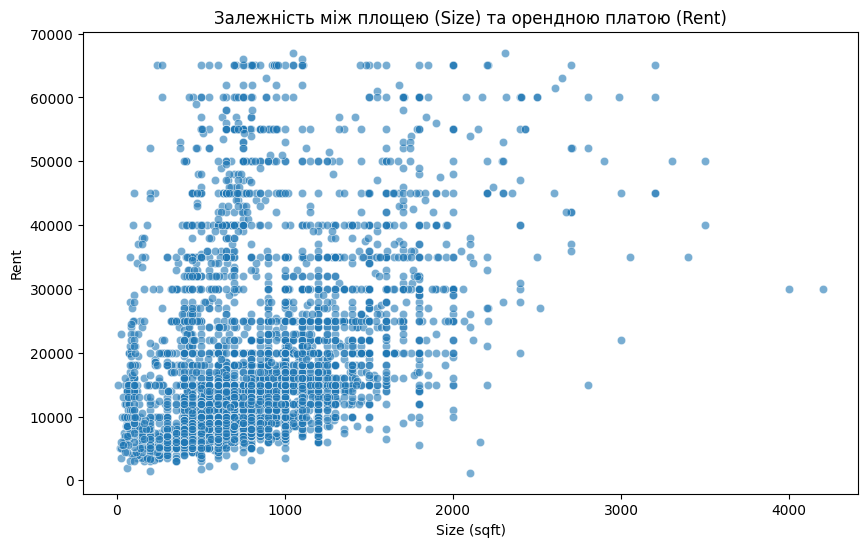

In [100]:
# 3.3 Побудова scatter plot між Size та Rent
plt.figure(figsize=(10,6))
sns.scatterplot(x="Size", y="Rent", data=df, alpha=0.6)
plt.title("Залежність між площею (Size) та орендною платою (Rent)")
plt.xlabel("Size (sqft)")
plt.ylabel("Rent")
plt.show()

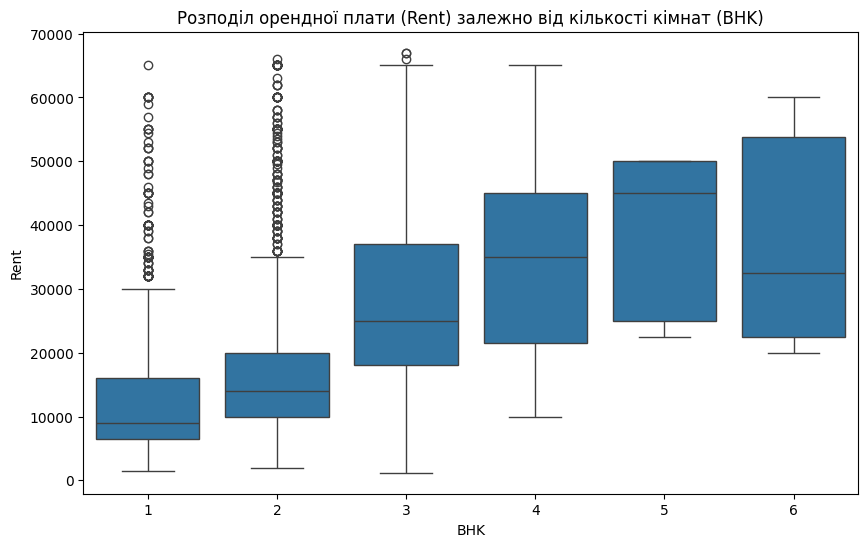

In [101]:
# 3.4 Аналіз взаємозв'язку між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)
plt.figure(figsize=(10,6))
sns.boxplot(x="BHK", y="Rent", data=df)
plt.title("Розподіл орендної плати (Rent) залежно від кількості кімнат (BHK)")
plt.xlabel("BHK")
plt.ylabel("Rent")
plt.show()

## Завдання 4: Feature Engineering та підготовка даних (4 бали)

**Що потрібно зробити:**
1. Закодуйте категоріальні змінні за допомогою One-Hot Encoding. Пригадайте, що в лекції ми говорили щодо кодування кат. змінних з великої кількістю різних значень і як працювати з такими випадками. Ви можете закодувати не всі кат. змінні, а лише ті, що вважаєте за потрібні (скажімо ті, що мають відносно небагато різних значень).
2. **Опціонально (по 0.5 бала за кожну доцільну ознаку):** Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі
3. Виберіть ознаки для побудови моделі (виключіть непотрібні колонки). Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.
4. Розділіть дані на ознаки (X) та цільову змінну (y)
5. Застосуйте стандартизацію до числових ознак


In [102]:
# 4.1 Визначимо категоріальні змінні
categorical_cols = ["Area Type", "City", "Furnishing Status", "Tenant Preferred"]
# ❗ "Area Locality" та "Point of Contact" мають занадто багато унікальних значень — виключимо

# 4.2 Визначимо числові змінні
numeric_cols = ["BHK", "Size", "Bathroom"]

In [103]:
# 4.3  Cтворимо нову ознаку: Rent за 1 sqft площі
df["Rent_per_sqft"] = df["Rent"] / df["Size"]
numeric_cols.append("Rent_per_sqft")

In [104]:
# 4.4  Формуємо матрицю ознак і ціль
X = df[categorical_cols + numeric_cols]
y = df["Rent"]

In [105]:
# 4.5  One-Hot Encoding для категоріальних та стандартизація для числових
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

In [106]:
# Перетворимо дані
X_prepared = preprocessor.fit_transform(X)

print("Розміри X до перетворення:", X.shape)
print("Розміри X після перетворення:", X_prepared.shape)

Розміри X до перетворення: (4226, 8)
Розміри X після перетворення: (4226, 19)


## Завдання 5: Розділення даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на навчальну (80%) та тестову (20%) вибірки.
2. Створіть модель лінійної регресії.
3. Навчіть модель на навчальних даних.
4. Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.
5. Зробіть прогнози на тренувальній та тестовій вибірках.

In [107]:
# 5.1  Розділяємо на train (80%) та test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_prepared, y, test_size=0.2, random_state=42
)

In [108]:
# 5.2Створюємо модель
model = LinearRegression()
model

LinearRegression()

In [109]:
# 5.3 Навчаємо модель
model.fit(X_train, y_train)

LinearRegression()

In [110]:
# 5.4 Виводимо коефіцієнти
coefficients = model.coef_
coefficients

array([ 1.31866030e+03,  7.12483254e+03,  1.20340441e+03,  4.89751483e+03,
        1.91554974e+03,  5.29884498e+02, -2.44543424e+03, -1.97201840e+03,
       -3.28412783e+03, -1.58973358e+03, -5.41226671e+03, -4.77733975e+03,
        1.70354863e+04,  2.25393908e+03, -6.71446480e+02, -1.58249260e+03,
        1.07898957e+03, -6.92178439e+00, -1.07206779e+03])

In [111]:
# Щоб зрозуміти, які ознаки відповідають яким коефіцієнтам:
# Отримуємо назви всіх ознак після трансформації
feature_names = numeric_cols + list(
    preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_cols)
)

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("Топ-10 ознак за впливом:")
print(coef_df.head(10))

Топ-10 ознак за впливом:
                        Feature   Coefficient
12                  City_Mumbai  17035.486263
1                          Size   7124.832535
10               City_Hyderabad  -5412.266705
3                 Rent_per_sqft   4897.514830
11                 City_Kolkata  -4777.339748
8                  City_Chennai  -3284.127833
6          Area Type_Super Area  -2445.434237
13  Furnishing Status_Furnished   2253.939078
7                City_Bangalore  -1972.018399
4          Area Type_Built Area   1915.549739


In [112]:
#Навчання моделі
model = LinearRegression()
model.fit(X_train, y_train)

# 5.5 Прогнози
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\nПриклади прогнозів:")
print("Train (перші 5):", y_train_pred[:5])
print("Test (перші 5):", y_test_pred[:5])


Приклади прогнозів:
Train (перші 5): [36733.5894506  29627.26926695 11028.25078003 16159.76905771
 18459.05238497]
Test (перші 5): [32068.95620848  1808.55927642 36241.66831938  1516.51689263
 14984.21552406]


## Завдання 6: Оцінка якості моделі (2 бали)

**Що потрібно зробити:**
1. Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок
2. Порівняйте метрики та зробіть висновок про якість моделі
3. Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (**Нагадування**: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)
4. Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі


In [113]:
# 6.1
#Метрики для тренувальної вибірки
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

#Метрики для тестової вибірки
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("=== Навчальна вибірка ===")
print(f"MAE : {mae_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R²  : {r2_train:.4f}")

print("\n=== Тестова вибірка ===")
print(f"MAE : {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²  : {r2_test:.4f}")

=== Навчальна вибірка ===
MAE : 5377.88
RMSE: 7524.29
R²  : 0.7035

=== Тестова вибірка ===
MAE : 5434.88
RMSE: 9049.58
R²  : 0.5729


***6.2 Аналіз метрик:***

Навчальна вибірка:

MAE ≈ 5378

RMSE ≈ 7524

R² ≈ 0.70 → модель пояснює ~70% варіації цільової змінної на train.

Тестова вибірка:

MAE ≈ 5435

RMSE ≈ 9050

R² ≈ 0.57 → модель пояснює ~57% варіації на нових даних.

###Висновок:

Якість моделі на тестовій вибірці нижча, ніж на тренувальній, що нормально, адже модель стикається з новими даними.

Проте падіння R² з 0.70 → 0.57 і зростання RMSE вказують, що модель частково переобучена – на нових даних точність гірша.

Загалом модель має середню якість: вона вловлює загальні закономірності, але прогнозує неідеально.

***Можна покращити результат за рахунок:***
- додаткового відбору/створення ознак,

- налаштування гіперпараметрів,

- використання більш складних моделей (наприклад, ансамблів: Random Forest, Gradient Boosting).

###6.3 Аналіз і висновок чи є ознаки перенавчання або недонавчання
Модель демонструє прийнятну якість на тренувальній вибірці (R² ≈ 0.70), проте на тестовій вибірці показники знижуються (R² ≈ 0.57, RMSE зростає), що свідчить про певні ознаки перенавчання. Недонавчання відсутнє, оскільки навіть на тренувальних даних модель пояснює значну частину варіації. Загалом модель узагальнює дані, але її стійкість можна підвищити за рахунок регуляризації або вдосконалення вибору ознак.

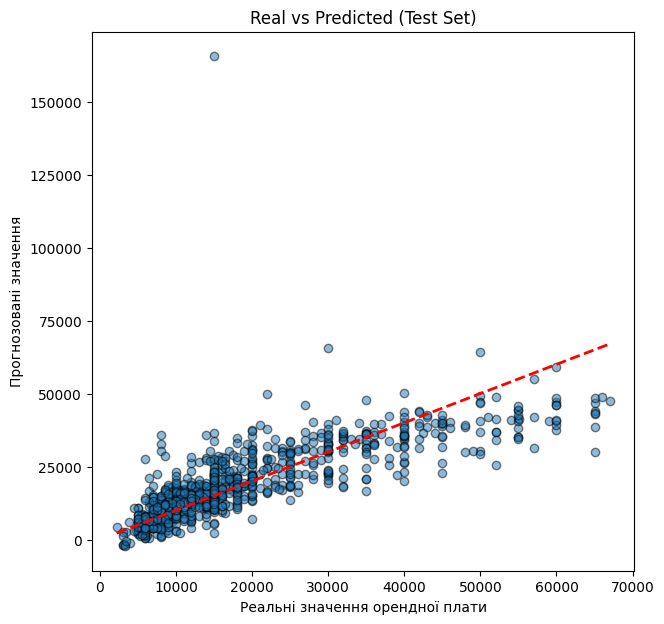

In [114]:
# 6.4 Scatter plot "реальні vs прогнозовані"
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Реальні значення орендної плати")
plt.ylabel("Прогнозовані значення")
plt.title("Real vs Predicted (Test Set)")
plt.show()

## Завдання 7: Аналіз помилок (4 бали)

**Що потрібно зробити:**
1. Обчисліть помилки (residuals = реальні - прогнозовані значення)
2. Побудуйте гістограму розподілу помилок
3. Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?
4. Знайдіть 5 прогнозів з найбільшими помилками
5. Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.
6. Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо :)

In [115]:
# 7.1  Обчислюємо помилки (residuals)
residuals = y_test - y_test_pred

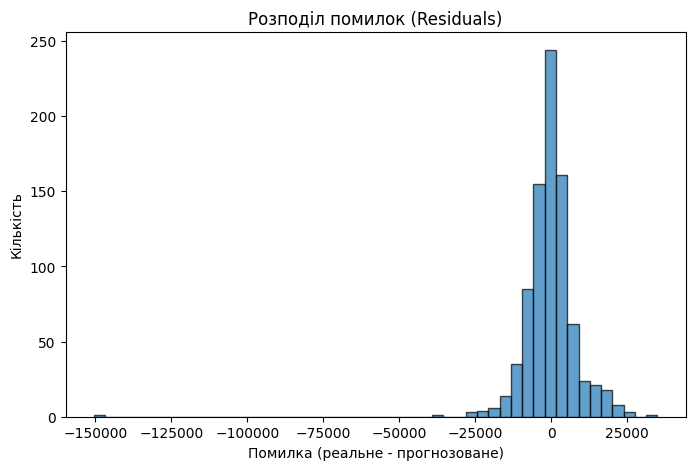

In [116]:
# 7.2  Гістограма розподілу помилок
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=50, edgecolor="black", alpha=0.7)
plt.title("Розподіл помилок (Residuals)")
plt.xlabel("Помилка (реальне - прогнозоване)")
plt.ylabel("Кількість")
plt.show()

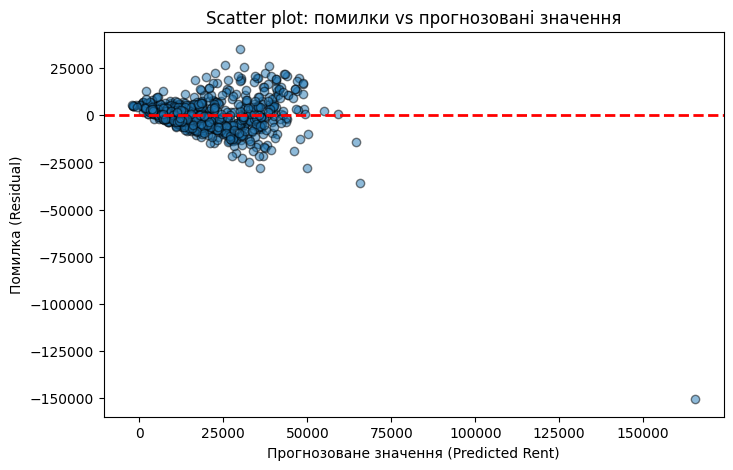

In [117]:
# 7.3 Scatter plot "Прогнозовані значення vs Помилки"
plt.figure(figsize=(8,5))
plt.scatter(y_test_pred, residuals, alpha=0.5, edgecolor="k")
plt.axhline(0, color="red", linestyle="--", lw=2)
plt.xlabel("Прогнозоване значення (Predicted Rent)")
plt.ylabel("Помилка (Residual)")
plt.title("Scatter plot: помилки vs прогнозовані значення")
plt.show()

З графіка видно, що:

- у діапазоні прогнозів до ~50 000 значення помилок більш-менш зібрані навколо нуля, хоч і з певним розкидом;
- чим більші прогнозовані значення (60 000+), тим сильніше помилки відхиляються вниз (є кілька великих негативних залишків).

Є навіть поодинокі дуже сильні викиди (–150 000), що явно псують загальну картину.

###Висновок:

Систематичного росту помилки разом із прогнозом по всій вибірці немає.

Проте для великих прогнозованих значень спостерігається збільшення варіації та сильні від’ємні помилки. Це означає, що модель гірше справляється з дорогими об’єктами (дорога оренда → недооцінка).

Отже, маємо гетероскедастичність (нерівномірний розкид залишків залежно від величини прогнозу).

In [118]:
# 7.4 П'ять прогнозів з найбільшими помилками
errors_abs = np.abs(residuals)
top5_idx = errors_abs.argsort()[-5:][::-1]

top5_errors = pd.DataFrame({
    "Real Rent": y_test.iloc[top5_idx].values,
    "Predicted Rent": y_test_pred[top5_idx],
    "Error": residuals.iloc[top5_idx].values
})
print("ТОП-5 найбільших помилок:")
display(top5_errors)

ТОП-5 найбільших помилок:


,Real Rent,Predicted Rent,Error
0,15000,165520.645561,-150520.645561
1,30000,65661.890138,-35661.890138
2,65000,30022.025371,34977.974629
3,8000,35924.421363,-27924.421363
4,22000,49856.113540,-27856.113540


In [119]:
# 7.5 Аналіз типів житла з найбільшими помилками
test_with_errors = pd.DataFrame(X_test)

test_with_errors["Real Rent"] = y_test
test_with_errors["Predicted Rent"] = y_test_pred
test_with_errors["Residual"] = residuals

In [120]:
# Наприклад, середня помилка за кількістю кімнат (BHK)
test_with_errors["BHK"] = X_test[:, df_clean.columns.get_loc("BHK")]

bhk_error = test_with_errors.groupby("BHK")["Residual"].mean().sort_values(key=abs, ascending=False)
print("\nСередні помилки за кількістю кімнат (BHK):")
print(bhk_error)


Середні помилки за кількістю кімнат (BHK):
BHK
-0.580125   -21645.546483
-1.434523   -14604.906864
-0.188954   -13976.232818
-0.312482    10293.001679
-0.771592   -10248.305819
                 ...     
 3.969804             NaN
 4.360974             NaN
 4.381562             NaN
 5.410958             NaN
 6.440354             NaN
Name: Residual, Length: 192, dtype: float64


### 7.6 Наступні кроки для покращення:

- cпробувати логарифмування цільової змінної Rent (часто допомагає при довгому хвості);
- dикористати більш складні моделі (Random Forest, Gradient Boosting);
- додати нові ознаки (наприклад, співвідношення Size/BHK, поверховість відносно max Floor тощо);
- врахувати нерівномірність між містами (окремі моделі або interaction features).